# Submission Guidelines

1.   Replace the "Student ID" of the notebook name with your Student ID.
2.   Download your solution in IPYNB format.
3.   Submit it in the designated post of Google Classroom.
4.   Click on `Turn In` to confirm your submission.

( `Make a copy` of this file. Both tasks should be in one ipynb.)

# Task Description - 001
The data provided is a subset of the PlantVillage dataset containing Apple Leaf samples. The samples are divided into three folders, labeled "Black Rot", "Cedar Apple Rust", and "Healthy", after the three main types of apple leaf diseases. There are a total of 2541 images of Apple leaves in the dataset. Your task is to write codes for a classifier (or a set of classifiers) that can accurately categorize the leaves into one of three groups using Logistic Regression. You have to implement Logistic Regression Classifier from scratch (third-party libraries are not allowed).


*   To reduce the training time, you can resize the images into smaller resolution.
*   Use the standard dataset split ratio (80-20).
*   The results should be reproducible.
*   Determine the overall accuracy as well as individual accuracy for each of these classes on the test set.
*   Demonstrate the effect of L2 regularization and different learning rates (at least three).


# Helper Functions

### 1. `cv2.imread(path, flag)`

Loads an image from the specified file

#### *Parameters*
* `path`: A string representing the path of the image to be read.
* `flag`: It specifies the way in which image should be read. It’s default value is `cv2.IMREAD_COLOR`.

##### Choice of `flag`
* `cv2.IMREAD_COLOR`: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag. Alternatively, we can pass integer value 1 for this flag.
* `cv2.IMREAD_GRAYSCALE`: It specifies to load an image in grayscale mode. Alternatively, we can pass integer value 0 for this flag.

#### *Return Value* 
An image that is loaded from the specified file.


### 2. `cv2.resize(source, dsize, dest, fx, fy, interpolation)`

Used to upscale, downscale, resize to a desired size while considering aspect ratio.

#### *Parameters*

* `source`: Input Image array (Single-channel, 8-bit or floating-point) 
* `dsize`: Size of the output array
* `dest`: Output array (Similar to the dimensions and type of Input image array) [optional]
* `fx`: Scale factor along the horizontal axis  [optional]
* `fy`: Scale factor along the vertical axis  [optional]
* `interpolation`: One of the interpolation methods discussed below [optional]

##### Choice of `interpolation` for Resizing
* `cv2.INTER_AREA`: This is used when we need to shrink an image.
* `cv2.INTER_CUBIC`: This is slow but more efficient.
* `cv2.INTER_LINEAR`: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.

#### *Return Value* 
A resized image.

### 3. `numpy.reshape(a, newshape)`

Gives a new shape to an array without changing its data.

#### *Parameters*

- `a`: Array to be reshaped.
- `newshape`: int or tuple of ints.

#### *Return Value* 
The reshaped array.

# Necessary Libraries
You can use other necessary libraries as well.

In [138]:
import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
import shutil
import pandas as pd

# Dataset Download

In [139]:
!curl -L -o 'apple.zip' 'https://drive.google.com/u/0/uc?id=1WZDAdKXdA1uKM6tl-dCWGUk7Um1EiEUO&export=download&confirm=t'
shutil.unpack_archive("/content/apple.zip", "/content/apple")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 36.3M  100 36.3M    0     0  86.4M      0 --:--:-- --:--:-- --:--:-- 86.4M


In [166]:
files = glob.glob('apple/*/*')
print(files[0])

apple/Apple___Black_rot/image (465).JPG


# Your Implementation

In [ ]:
X = []
y = []
for file in files:
    img = cv2.imread(file)
    img = cv2.resize(img, (64, 64))  # Resize image to reduce training time
    X.append(img.flatten())
    label = file.split('/')[1]
    if label == 'Black Rot':
        y.append(0)
    elif label == 'Cedar Apple Rust':
        y.append(1)
    else:
        y.append(2)


In [ ]:
X = np.array(X)
y = np.array(y)
print(X[0])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
print(X[0])

In [ ]:
# m,_ = X.shape
# y= y.reshape(m,1)
# print(y.shape,X.shape)

In [ ]:
X[X==0]+=1e-6
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
class LogisticRegression(object):
    def __init__(self, learning_rate=0.1, max_iter=100, regularization='l2', lambda_ = 10 , tolerance = 1e-4):
        self.learning_rate  = learning_rate
        self.max_iter       = max_iter
        self.regularization = regularization
        self.lambda_        = lambda_
        self.tolerance      = tolerance
        self.loss_log       = []
    
    def fit(self, X, y, verbose = False):
        no_samples = X.shape[0]
        no_features = X.shape[1]

        self.W = np.random.rand(no_features + 1)
        
        extra_feature_with_value_1 = np.ones((no_samples, 1))
        X = np.concatenate((extra_feature_with_value_1, X), axis = 1)
        
        self.loss_log = []

        for iteration in range(self.max_iter):
            Z = np.matmul(X,  self.W)

            y_hat = self.__sigmoid(Z)
            
            errors = y_hat - y

            if self.regularization:
              cost = (-1.0/no_samples) * np.sum( y*np.log(y_hat) + (1.0 - y)*np.log(1.0-y_hat)) + (1.0/no_samples)* self.lambda_ * np.matmul(self.W, np.transpose(self.W))
            else:
              cost = (-1.0/no_samples) * np.sum( y*np.log(y_hat) + (1.0 - y)*np.log(1.0-y_hat))

            self.loss_log.append(cost)
            
            if verbose:
                print(f'Iteration {iteration} Loss: {cost}')

            if self.regularization is not None:
                delta_grad = (1./no_samples) *(np.matmul(np.transpose(errors), X)+ self.lambda_ * self.W)
            else:
                delta_grad = (1./no_samples) *(np.matmul(np.transpose(errors), X))
                
            self.W -= self.learning_rate * delta_grad

            # if np.all(abs(delta_grad) >= self.tolerance):
            #     self.W -= self.learning_rate * delta_grad
            # else:
            #     break
                
        return self

    def predict_proba(self, X):
        no_samples = X.shape[0]
        no_features = X.shape[1]

        samples = np.reshape(X, (no_samples, no_features))
        weights = np.reshape(self.W[1:], (no_features, 1))

        samples = np.matrix(samples)
        weights = np.matrix(weights)
        
        wtx = np.matmul(samples, weights)
        
        z = wtx + self.W[0]

        probabilities = self.__sigmoid(z)
        return probabilities
    
    def predict(self, X):
        return np.round(self.predict_proba(X))
        
    def __sigmoid(self, z):
        return (1.0 / (1.0 + np.exp(-z)))

In [192]:
from sklearn import metrics
MAX_ITER=100
clf_no_reg=LogisticRegression(max_iter=MAX_ITER,learning_rate=0.001,regularization=None)
clf_no_reg.fit(X_train,y_train,verbose=False)

clf_reg_10=LogisticRegression(max_iter=MAX_ITER,learning_rate=0.001,lambda_=10)
clf_reg_10.fit(X_train,y_train,verbose=False)

clf_reg_20=LogisticRegression(max_iter=MAX_ITER,learning_rate=0.001,lambda_=20)
clf_reg_20.fit(X_train,y_train,verbose=False)

clf_reg_10b=LogisticRegression(max_iter=MAX_ITER,learning_rate=0.0001,lambda_=10)
clf_reg_10b.fit(X_train,y_train,verbose=False)

clf_reg_20b=LogisticRegression(max_iter=MAX_ITER,learning_rate=0.0001,lambda_=20)
clf_reg_20b.fit(X_train,y_train,verbose=False)


<ipython-input-191-b80598636716>:31: RuntimeWarning: divide by zero encountered in log
  cost = (-1.0/no_samples) * np.sum( y*np.log(y_hat) + (1.0 - y)*np.log(1.0-y_hat))
<ipython-input-191-b80598636716>:29: RuntimeWarning: divide by zero encountered in log
  cost = (-1.0/no_samples) * np.sum( y*np.log(y_hat) + (1.0 - y)*np.log(1.0-y_hat)) + (1.0/no_samples)* self.lambda_ * np.matmul(self.W, np.transpose(self.W))


# Task Description - 002
Apply Linear Regression on the following dataset to predict the weight of fish. Use necessary data cleaning/pre-processing steps. Then


*   Plot the regresion line.
*   Plot training and test MSE over the epochs.



In [193]:
!gdown 1ka5iKjA5DawzRGgCpnMfc8NygZbF12YL

Downloading...
From: https://drive.google.com/uc?id=1ka5iKjA5DawzRGgCpnMfc8NygZbF12YL
To: /content/Fish.csv
100% 6.02k/6.02k [00:00<00:00, 6.69MB/s]


In [194]:
data = pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [195]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [196]:
data.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [197]:
# dummy creation
def addDummy(data, col):
  dummy = pd.get_dummies(data[col])

  data.drop(col, axis = 1, inplace = True)
  data = pd.concat([data, dummy], axis = 1)

  return data


In [198]:
data=addDummy(data,'Species')
data.head()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [199]:
data.shape

(159, 13)

In [200]:
X= data.iloc[:,1:]
X= X.values
m=X.shape[0]
X.shape


(159, 12)

In [201]:
y= data.iloc[:,0]
y=y.values
y=y.reshape(m,1)
y.shape

(159, 1)

In [202]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X= scaler.fit_transform(X)
X

array([[0.30485437, 0.30909091, 0.35810811, ..., 0.        , 0.        ,
        0.        ],
       [0.32038835, 0.32545455, 0.37837838, ..., 0.        , 0.        ,
        0.        ],
       [0.3184466 , 0.32909091, 0.37668919, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08932039, 0.08363636, 0.08445946, ..., 0.        , 1.        ,
        0.        ],
       [0.11067961, 0.10727273, 0.10810811, ..., 0.        , 1.        ,
        0.        ],
       [0.1223301 , 0.12      , 0.125     , ..., 0.        , 1.        ,
        0.        ]])

In [203]:
def linearRegression(X, y, alpha = 0.001, max_iter = 100000):
  m, n = X.shape
  n = n + 1
  x = np.append(np.ones((m, 1)), X, axis=1)
  
  wt_history = []
  wt = np.random.rand(n, 1)

  for i in range(max_iter):
    wt_history.append(wt.copy()) 
    y_predicted = predict(X, wt)

    dw = (1/m) * np.dot(x.T, (y_predicted - y))
    wt -= alpha * dw

  wt_history.append(wt.copy())
  return wt_history


In [204]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=7)
print(X.shape,y.shape,X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(159, 12) (159, 1) (127, 12) (32, 12) (127, 1) (32, 1)


In [205]:
def predict(X, wt):
  return np.dot(X, wt[1:])+wt[0]

def mse(y, y_predicted):
  return np.mean((y_predicted-y)**2)

In [206]:
wt_history= linearRegression(X_train,y_train,alpha=0.0001)

wt_last= wt_history[-1]
wt_last.shape

(13, 1)

In [207]:
def show_line(X_train, X_test, y_train, y_test, y_predicted):
    cmap = plt.get_cmap('viridis')
    fig = plt.figure(figsize = (8, 6))
    m1 = plt.scatter(X_train, y_train, color = cmap(0.9), s = 10, label = 'Training Data')
    m2 = plt.scatter(X_test, y_test, color = cmap(0.5), s = 10, label = 'Testing Data')
    plt.plot(X_test, y_predicted, color = 'black', linewidth = 2, label = 'Regression Line')
    plt.legend()
    plt.show()

ValueError: ignored

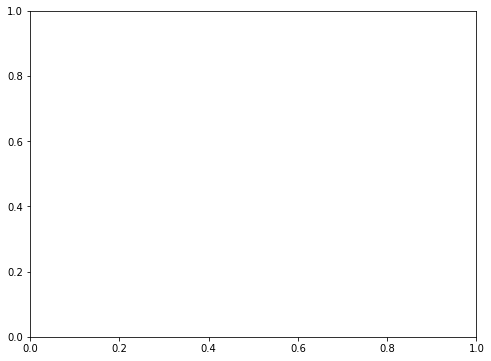

In [208]:
show_line(X_train,X_test,y_train,y_test,predict(X_test,wt_last))

In [210]:
y_train_predicted = predict(X_train, wt_last)
y_test_predicted = predict(X_test, wt_last)

In [211]:
print(np.mean(y_test))
print(np.mean(y_test_predicted))

print(mse(y_train, y_train_predicted))
print(mse(y_test, y_test_predicted))

352.459375
396.2123976950863
22705.26838788246
23180.302324604287


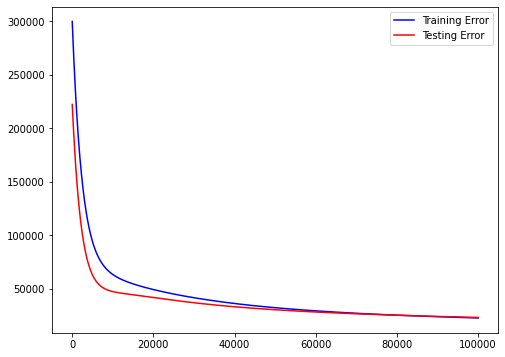

In [212]:
err_train = []
err_test = []
for wt in wt_history:
  y_train_predicted = predict(X_train, wt)
  y_test_predicted = predict(X_test, wt)

  err_train.append(mse(y_train, y_train_predicted))
  err_test.append(mse(y_test, y_test_predicted))

fig = plt.figure(figsize = (8, 6))
plt.plot(err_train, color='b')
plt.plot(err_test, color='r')
plt.legend(['Training Error', 'Testing Error'])
plt.show()

# Submission Guidelines

1.   Replace the "Student ID" of the notebook name with your Student ID.
2.   Download your solution in IPYNB format.
3.   Submit it in the designated post of Google Classroom.
4.   Click on `Turn In` to confirm your submission.

